In [1]:
## importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve,auc

from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = arff.loadarff('Training Dataset.arff')  # loading dataset
df = pd.DataFrame(data[0])                     # converting the data to a dataframe
for i in df:                                   # converting categorical objects to integers
    df.loc[:,i] = df.loc[:,i].astype(int)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
## checking general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int32
 1   URL_Length                   11055 non-null  int32
 2   Shortining_Service           11055 non-null  int32
 3   having_At_Symbol             11055 non-null  int32
 4   double_slash_redirecting     11055 non-null  int32
 5   Prefix_Suffix                11055 non-null  int32
 6   having_Sub_Domain            11055 non-null  int32
 7   SSLfinal_State               11055 non-null  int32
 8   Domain_registeration_length  11055 non-null  int32
 9   Favicon                      11055 non-null  int32
 10  port                         11055 non-null  int32
 11  HTTPS_token                  11055 non-null  int32
 12  Request_URL                  11055 non-null  int32
 13  URL_of_Anchor                11055 non-null  i

In [4]:
## cheching the datatypes of the features
df.dtypes

having_IP_Address              int32
URL_Length                     int32
Shortining_Service             int32
having_At_Symbol               int32
double_slash_redirecting       int32
Prefix_Suffix                  int32
having_Sub_Domain              int32
SSLfinal_State                 int32
Domain_registeration_length    int32
Favicon                        int32
port                           int32
HTTPS_token                    int32
Request_URL                    int32
URL_of_Anchor                  int32
Links_in_tags                  int32
SFH                            int32
Submitting_to_email            int32
Abnormal_URL                   int32
Redirect                       int32
on_mouseover                   int32
RightClick                     int32
popUpWidnow                    int32
Iframe                         int32
age_of_domain                  int32
DNSRecord                      int32
web_traffic                    int32
Page_Rank                      int32
G

In [5]:
## all features integers hence we can check statistical information
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Result', ylabel='count'>

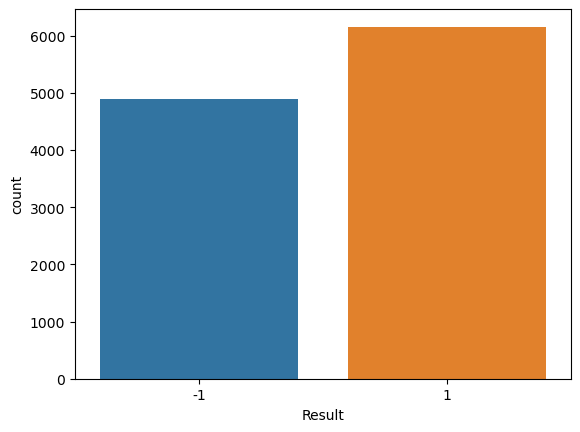

In [6]:
## checking how each class is represented
## if there is class imbalance or not and visualizing 
##  df.Result.value_counts().plot(kind='bar')
sns.countplot(x='Result',data=df)

In [7]:
## counting the number of phishing and non-phishing instances
## in the Results
class_count = df['Result'].value_counts()
print(class_count)

 1    6157
-1    4898
Name: Result, dtype: int64


In [8]:
## checking the percentage of of phishing and non phishing classes in the dataset
non_phish_count = (df[['Result']] == 1).sum()
phish_count = (df[['Result']] == -1).sum()
total_count = non_phish_count + phish_count
print("Percentage of Phishing classes: %.2f%%" %((phish_count/total_count)*100))
print("Percentage of Non-Phishing classes: %.2f%%" %((non_phish_count/total_count)*100))

Percentage of Phishing classes: 44.31%
Percentage of Non-Phishing classes: 55.69%


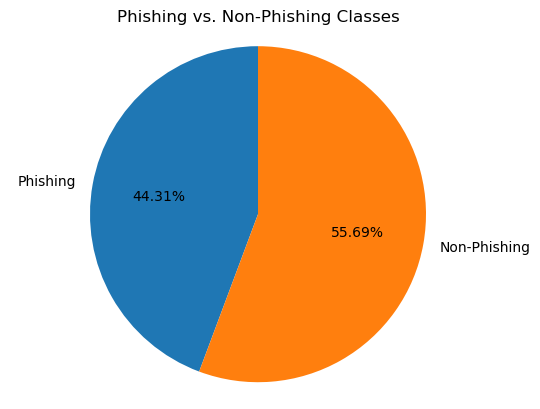

In [9]:
# Create labels and sizes for the pie chart
labels = ['Phishing', 'Non-Phishing']
sizes = [phish_count.values[0], non_phish_count.values[0]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Phishing vs. Non-Phishing Classes')

# Display the chart
plt.show()

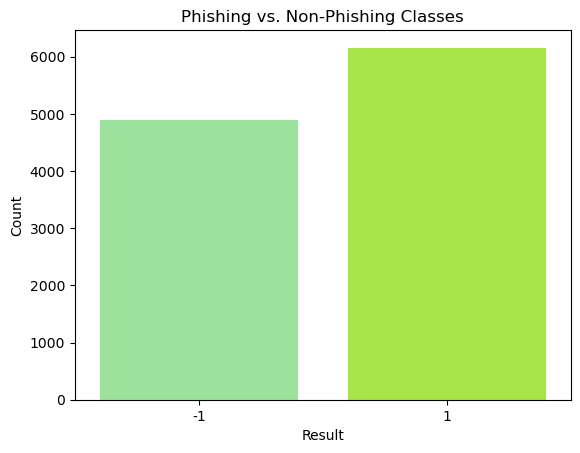

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
colors = ["#90EE90", "#ADFF2F"]

# Create the countplot
sns.set_palette(colors)
sns.countplot(x='Result', data=df)

# Add labels and title
plt.xlabel("Result")
plt.ylabel("Count")
plt.title("Phishing vs. Non-Phishing Classes")

# Show the plot
plt.show()


In [11]:
## checking for missing values 
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [12]:
## there are no missing values
## we can go ahead and check for duplicate
df.duplicated().sum()

5206

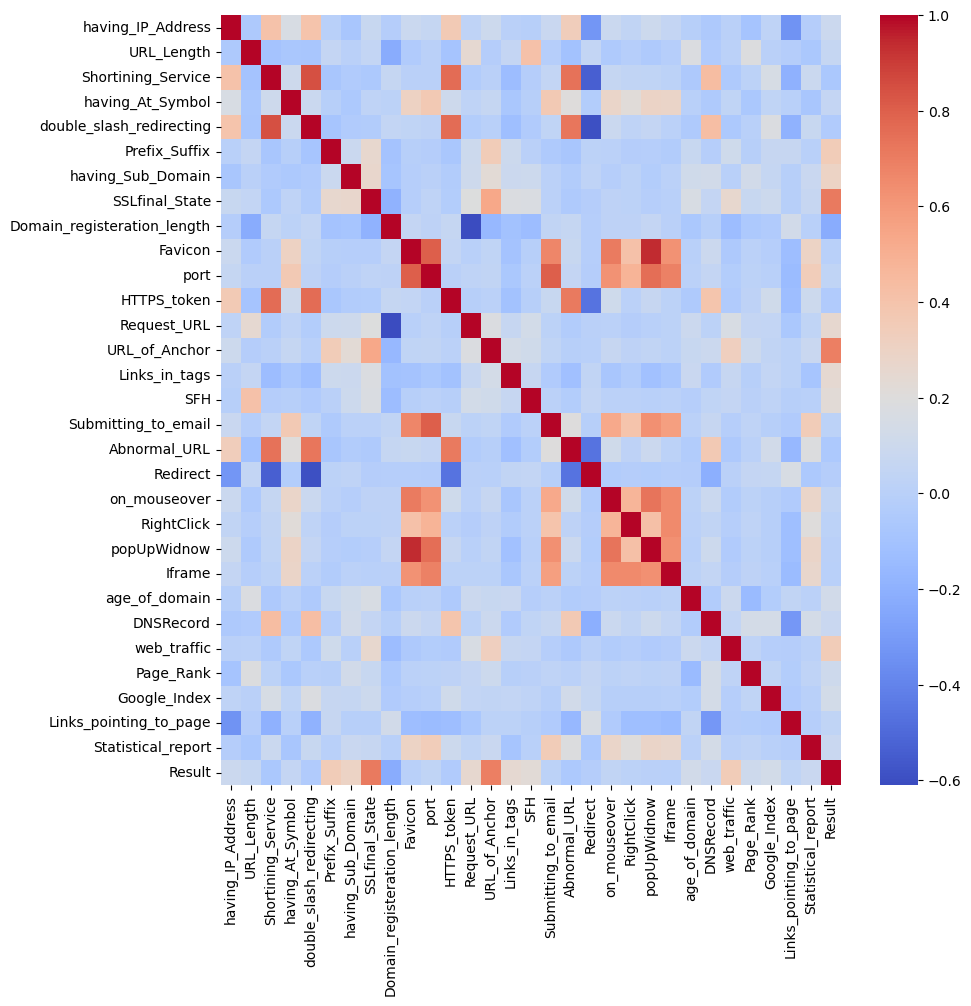

In [13]:
## there are also no duplicates
## checking correlation between features and visualising
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=None, cmap='coolwarm')
plt.show()

In [14]:
## Print out correlation with target variable
print("Amount of correlation for each feature:")
corr_quality = corr_matrix['Result']
print(corr_quality.sort_values(ascending=False))

Amount of correlation for each feature:
Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IP_Address              0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URL_Length                     0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
popUpWidnow                    0.000086
Favicon                       -0.000280


### Preparing dataset for model training

Here we will split the data into traing and testing set
1.X : a pandas dataframe containing only features
2.y : a pandas dataframe containing only target variable
3.X_train : portion of the features to be used for model training 
4.y_train : portion of the labels/target to be used for model training
5.X_test :  portion of the dataset/dataframe to be used to make predictions after training the model
6.y_test :  portion of the labels/target to be used to measure or evaluate model accuray, precision , recall etc.


In [15]:
## separating label/target from features( separating X from y )
X = df.drop('Result', axis=1)
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [16]:
y = df['Result']
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int32

In [17]:
## checking the dimensions of X(features) and y(target)
print("The shape of X is : ", X.shape)
print("The shape of y is : ", y.shape)

The shape of X is :  (11055, 30)
The shape of y is :  (11055,)


In [18]:
## now we can split X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
## random state is set to zero to ensure reproduciability
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7738, 30)
y_train (7738,)
X_test (3317, 30)
y_test (3317,)


### Applying Logistic regression to make predictions

In [19]:
logistic_reg = LogisticRegression()  # creating an instance of LogisticRegression classifier
logistic_reg.fit(X_train, y_train)   # fitting the model
y_pred_logistic_reg = logistic_reg.predict(X_test)  # make predictions

In [20]:
## Evaluation with confusion matrix
conf_mat_logistic_reg = metrics.confusion_matrix(y_test, y_pred_logistic_reg)
conf_mat_logistic_reg

array([[1341,  157],
       [  99, 1720]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

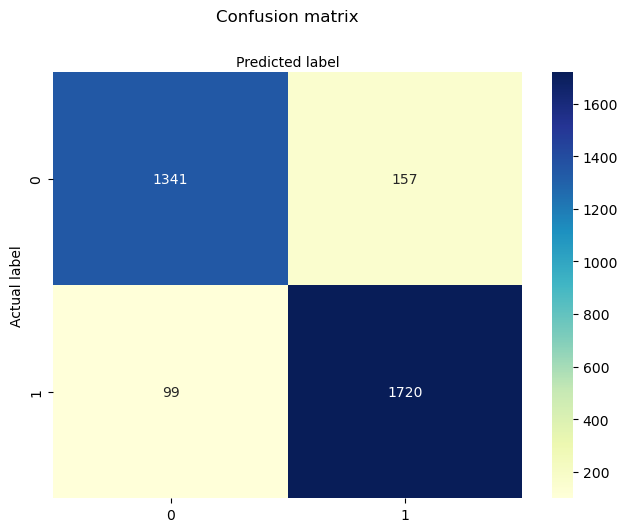

In [21]:
## visualizing the confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_logistic_reg), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [22]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_logistic_reg))
print("Precision", metrics.precision_score(y_test, y_pred_logistic_reg))
print("Recall", metrics.recall_score(y_test, y_pred_logistic_reg))

Accuracy 0.9228218269520652
Precision 0.9163558870538092
Recall 0.9455744914788345


In [23]:
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_logistic_reg))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1498
           1       0.92      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



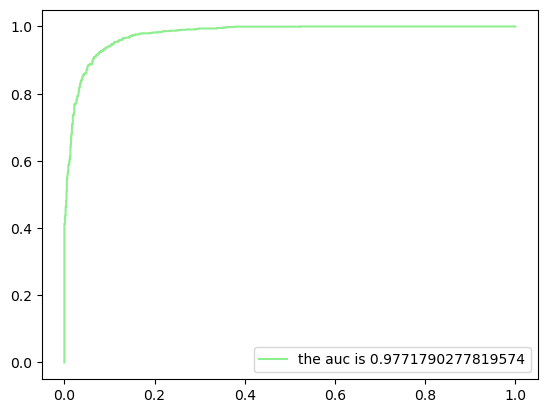

In [24]:
## ploting ROC curve
prob_y_pred_logistic_reg = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred_logistic_reg)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred_logistic_reg)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying Support vector machines(SVM)

In [25]:
svc = SVC(kernel='linear', C = 0.025) #C is the regularization parameter
svc.fit(X_train, y_train)             # fiting the svm model
y_pred_svm = svc.predict(X_test)      # making predictions

In [26]:
## Evaluation with confusion matrix
conf_mat_svm = metrics.confusion_matrix(y_test, y_pred_svm)
conf_mat_svm

array([[1334,  164],
       [  91, 1728]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

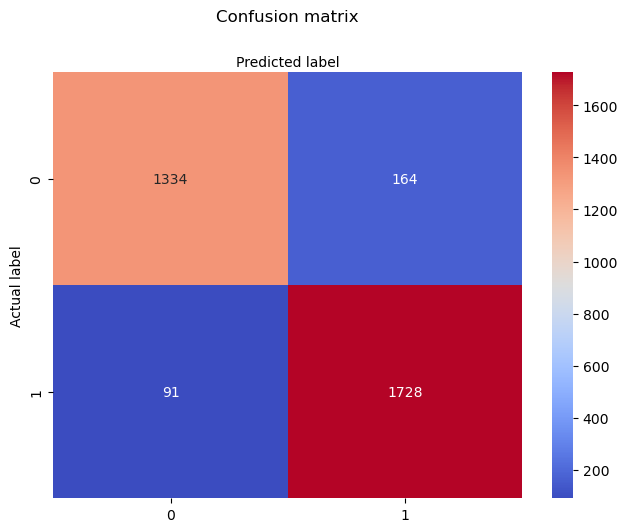

In [27]:
## visualize confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_svm), annot=True, cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [28]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_svm))
print("Precision", metrics.precision_score(y_test, y_pred_svm))
print("Recall", metrics.recall_score(y_test, y_pred_svm))

Accuracy 0.9231233041905336
Precision 0.9133192389006343
Recall 0.9499725123694338


In [29]:
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1498
           1       0.91      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



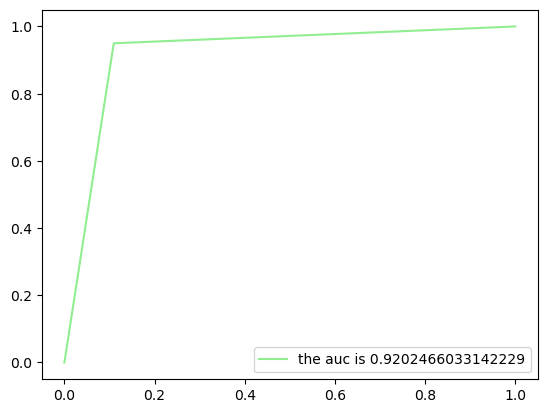

In [30]:
## ploting ROC curve
fpr,tpr,thresh = roc_curve(y_test, y_pred_svm)
#roc_auc = accuracy_score(y_test, y_pred_svm)

#fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred_logistic_reg)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, y_pred_svm)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying Decision Tree Classifier

In [31]:
## create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()
## train decision tree classifier 
dt_classifier.fit(X_train,y_train)
## make predictions with test dataset
y_pred_dt = dt_classifier.predict(X_test)

In [32]:
## Evaluation with confusion matrix
conf_mat_dt = metrics.confusion_matrix(y_test, y_pred_dt)
conf_mat_dt

array([[1428,   70],
       [  51, 1768]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

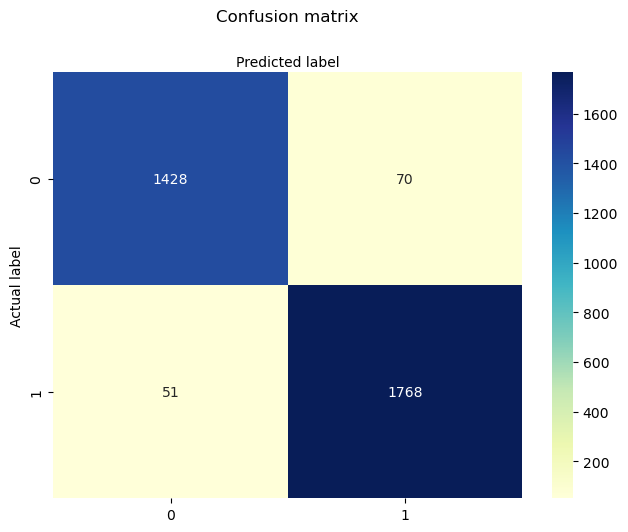

In [33]:
## visualizing the confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_dt), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [34]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dt))
print("Precision", metrics.precision_score(y_test, y_pred_dt))
print("Recall", metrics.recall_score(y_test, y_pred_dt))
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_dt))

Accuracy 0.963521254145312
Precision 0.9619151251360174
Recall 0.9719626168224299
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1498
           1       0.96      0.97      0.97      1819

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



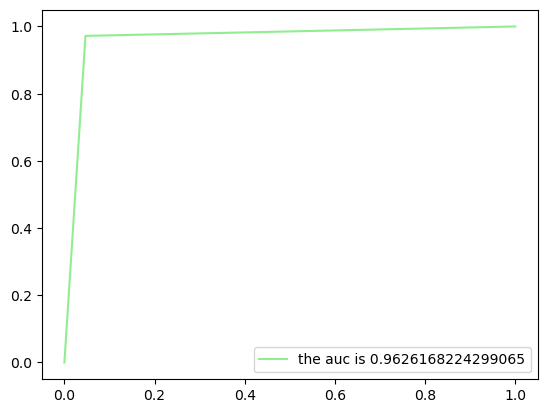

In [35]:
## ploting ROC curve
fpr,tpr,thresh = roc_curve(y_test, y_pred_dt)

auc = metrics.roc_auc_score(y_test, y_pred_dt)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying Random Forest Classifier

In [36]:
## create rf model object
## fit the model
rf_classifier = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=0)

In [37]:
## make predictions with X_test
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf 

array([-1, -1, -1, ..., -1,  1,  1])

In [38]:
## evaluation with confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_mat_rf)

[[1423   75]
 [  35 1784]]


Text(0.5, 427.9555555555555, 'Predicted label')

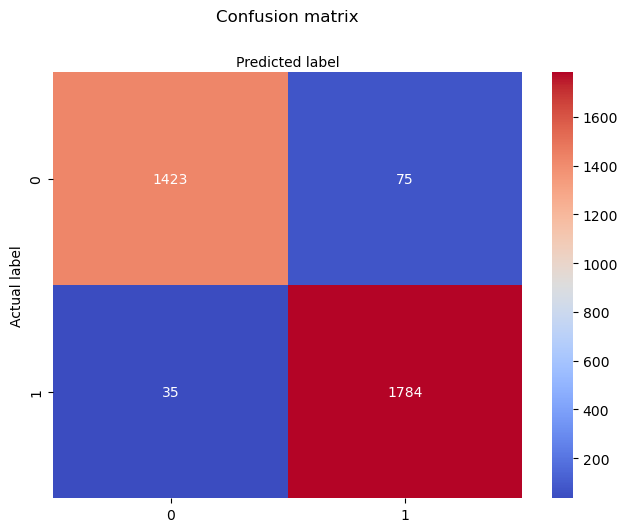

In [39]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [40]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision", metrics.precision_score(y_test, y_pred_rf))
print("Recall", metrics.recall_score(y_test, y_pred_rf))

Accuracy 0.9668375037684654
Precision 0.9596557288864981
Recall 0.9807586586036283


In [41]:
## checking precision recall, and accuracy
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1498
           1       0.96      0.98      0.97      1819

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



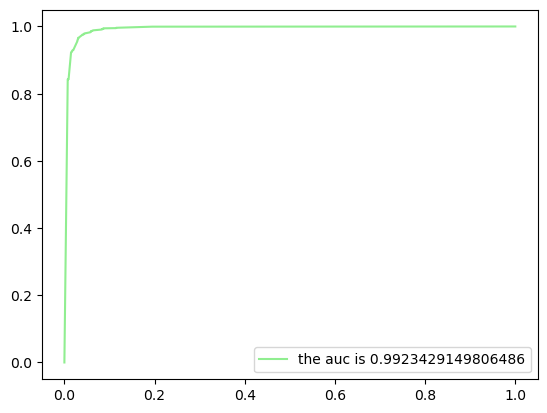

In [42]:
## ploting ROC curve
## ploting ROC curve
prob_y_pred = rf_classifier.predict_proba(X_test)[::,1]  ## why the ::
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying K Nearest Neighbours

In [43]:
# creating and training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# making predictions
## make predictions with X_test
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([-1, -1, -1, ..., -1,  1,  1])

In [45]:
## evaluation with confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_mat_knn)

[[1395  103]
 [  68 1751]]


Text(0.5, 427.9555555555555, 'Predicted label')

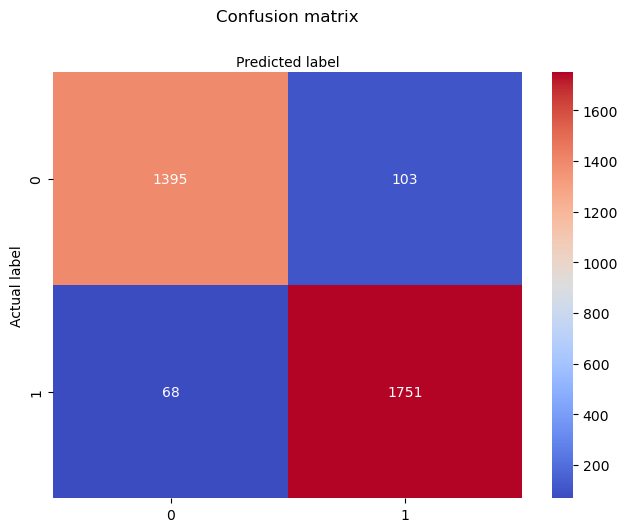

In [46]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_knn), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [47]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision", metrics.precision_score(y_test, y_pred_knn))
print("Recall", metrics.recall_score(y_test, y_pred_knn))

Accuracy 0.9484473922218872
Precision 0.9444444444444444
Recall 0.9626168224299065


In [48]:
## checking precision recall, and accuracy
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1498
           1       0.94      0.96      0.95      1819

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



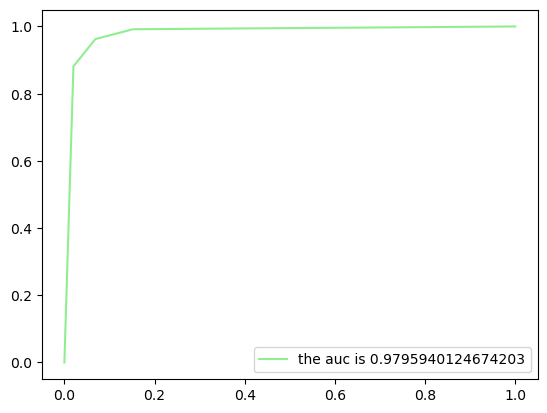

In [49]:
## ploting ROC curve
prob_y_pred = knn.predict_proba(X_test)[::,1]  
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred) 
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying XGBoost Classifier

In [50]:
y_train_xgb = np.where(y_train == -1, 0, y_train) ## converting -1 class to zero since xgboostclassifier expects o or 1
y_test_xgb =  np.where(y_test == -1, 0, y_test)
## training and making predictions
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 0, 1, ..., 0, 1, 1])

In [51]:
## evaluation with confusion matrix
conf_mat_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print(conf_mat_xgb)

[[1428   70]
 [  31 1788]]


Text(0.5, 427.9555555555555, 'Predicted label')

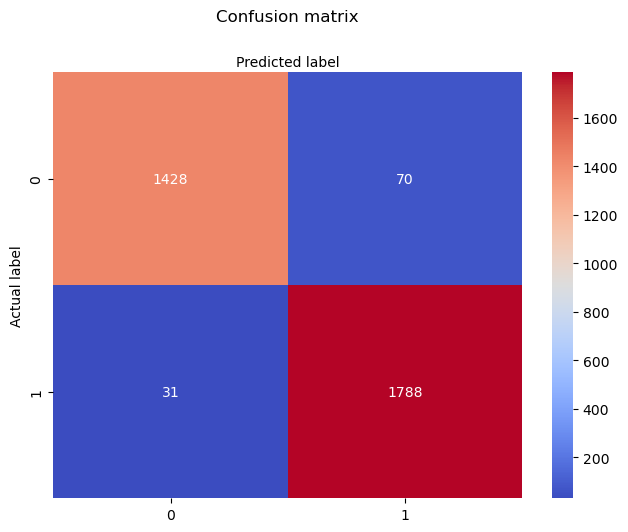

In [52]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_xgb), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [53]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test_xgb, y_pred_xgb))
print("Precision", metrics.precision_score(y_test_xgb, y_pred_xgb))
print("Recall", metrics.recall_score(y_test_xgb, y_pred_xgb))

Accuracy 0.969550798914682
Precision 0.9623250807319699
Recall 0.982957669048928


In [54]:
## checking precision recall, and accuracy
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1498
           1       0.96      0.98      0.97      1819

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



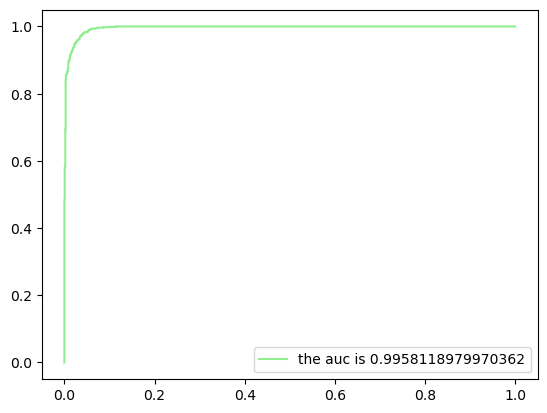

In [55]:
## ploting ROC curve
prob_y_pred = xgb.predict_proba(X_test)[::,1]  
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred) 
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

## Comparing Model Accuracy and AUC(update these values)

In [56]:
import pandas as pd

df_compare_models = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Trees", "Random Forest", "KNN", "XGBoost"],
    "Accuracy": [0.920, 0.921, 0.962, 0.965, 0.945, 0.997],
    "AUC": [0.976, 0.917, 0.961, 0.997, 0.917, 0.996]
})

df_compare_models


,Model,Accuracy,AUC
0,Logistic Regression,0.920,0.976
1,SVM,0.921,0.917
2,Decision Trees,0.962,0.961
3,Random Forest,0.965,0.997
4,KNN,0.945,0.917
5,XGBoost,0.997,0.996


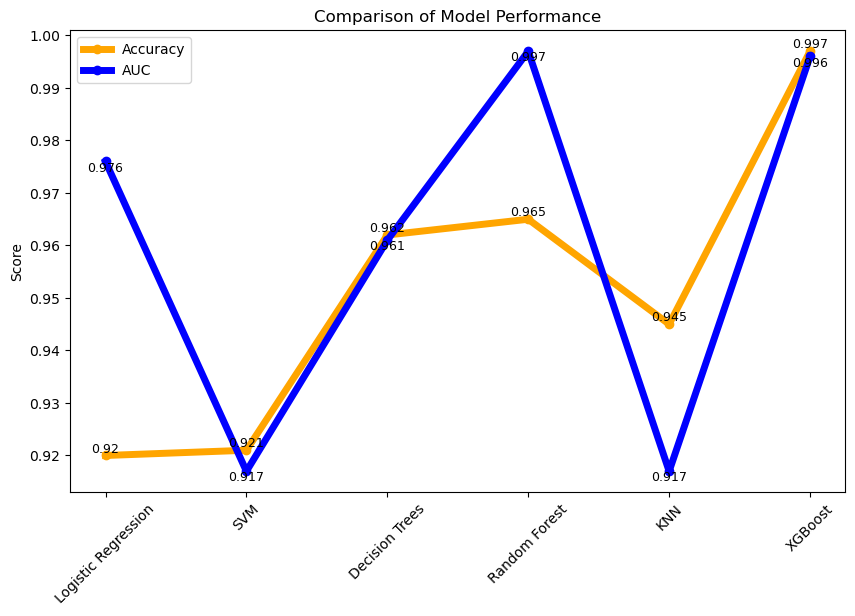

In [57]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line for Accuracy with orange color and thicker line
plt.plot(df_compare_models['Model'], df_compare_models['Accuracy'], marker='o', color='orange', label='Accuracy', linewidth=5)

# Plot the line for AUC with black color and thicker line
plt.plot(df_compare_models['Model'], df_compare_models['AUC'], marker='o', color='blue', label='AUC', linewidth=5)

# Add labels to the data points
for x, y_acc, y_auc in zip(df_compare_models['Model'], df_compare_models['Accuracy'], df_compare_models['AUC']):
    plt.text(x, y_acc, f'{y_acc}', ha='center', va='bottom', fontsize=9)
    plt.text(x, y_auc, f'{y_auc}', ha='center', va='top', fontsize=9)

# Set the y-axis label
plt.ylabel('Score')

# Set the title of the plot
plt.title('Comparison of Model Performance')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


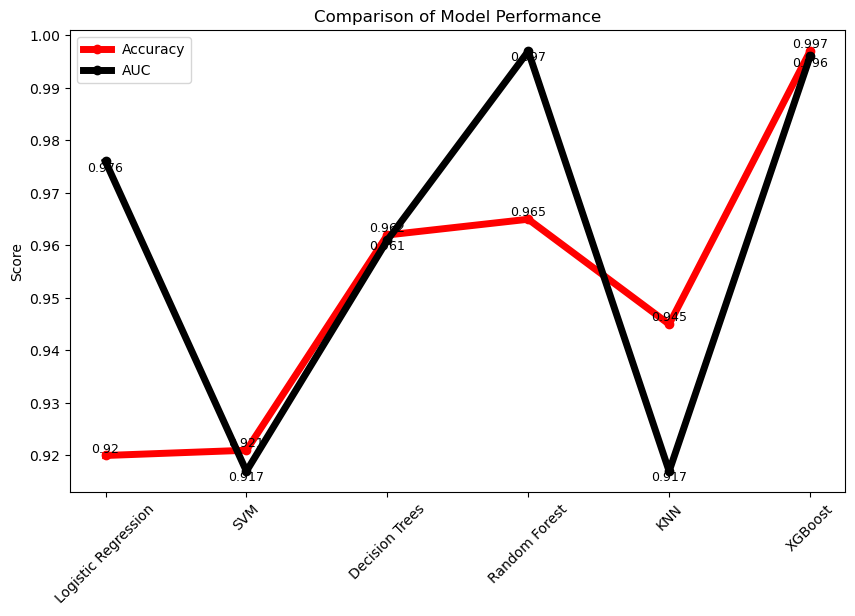

In [58]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line for Accuracy with red color and thicker line
plt.plot(df_compare_models['Model'], df_compare_models['Accuracy'], marker='o', color='red', label='Accuracy', linewidth=5)

# Plot the line for AUC with black color and thicker line
plt.plot(df_compare_models['Model'], df_compare_models['AUC'], marker='o', color='black', label='AUC', linewidth=5)

# Add labels to the data points
for x, y_acc, y_auc in zip(df_compare_models['Model'], df_compare_models['Accuracy'], df_compare_models['AUC']):
    plt.text(x, y_acc, f'{y_acc}', ha='center', va='bottom', fontsize=9)
    plt.text(x, y_auc, f'{y_auc}', ha='center', va='top', fontsize=9)

# Set the y-axis label
plt.ylabel('Score')

# Set the title of the plot
plt.title('Comparison of Model Performance')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()
